# Calcluating the g-factor

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Number of points
resolution = 1000

# Size of the A/B semiconductor (nm)
sizeA = 9
sizeB = 1
size = sizeA + sizeB

# Conduction band offset between A and B (meV)
bandOffset = 300

# E field from the gate above
gateField = 10

In [70]:
def potentialFunc(z):
    if (z < 0):
        return bandOffset
    else:
        return gateField * z

In [71]:
# Function to make the Laplcian part of the matrix for the hamiltonian
def make_laplacian():
    
    laplacian = []

    dx = size/resolution
    laplacian = np.eye(resolution) # Make the Laplcian a diagonal square matrix of the size of the number of steps
    laplacian *= -2
    # Loop through every point and set the laplcian
    for x in range(resolution):
        if x != 0:
            laplacian[x][x-1] += 1
        if x != resolution - 1:
            laplacian[x][x+1] += 1

    laplacian = laplacian/dx
    return laplacian

In [72]:
# Function to make the potential matrix
# This could be more efficient by not looping through the whole thing to make the potential but instead
# have the function that detects when a square changes call something to update the potential for that grid point
# This would need me to always store the potential though instead of just calculating it when I need it
def make_potential():
    potential = []

    potential = np.zeros((resolution, resolution))
    xValues = np.linspace(-sizeB, sizeA, resolution)
    for i in range(resolution):
        potential[i][i] = potentialFunc(xValues[i])

    return potential

In [73]:
# Function to solve for the potential
def solve():

    # Generate the Laplacian and potential and make the Hamiltonian
    laplacian = make_laplacian()
    potential = make_potential()
    hamiltonian = laplacian + potential

    # Use Library to solve for the hamiltonian
    eval, vec = np.linalg.eigh(hamiltonian)
    np.append(eval, 0)
    np.append(vec, [])
    evals = []
    evecs = []
    temp = []
    # Loop throug the solutions and add them to list of lists based on degeneracy
    for i in range(len(eval) - 1):
        temp.append(vec[:,i])
        if np.abs(eval[i] - eval[i+1]) > 0.0001:
            evecs.append(temp)
            evals.append(eval[i])
            temp = []
    print(hamiltonian)
    return evals, evecs

In [74]:
evals, evecs = solve()

[[ 100.          100.            0.         ...    0.
     0.            0.        ]
 [ 100.          100.          100.         ...    0.
     0.            0.        ]
 [   0.          100.          100.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -191.02002002
   100.            0.        ]
 [   0.            0.            0.         ...  100.
  -191.01001001  100.        ]
 [   0.            0.            0.         ...    0.
   100.         -191.        ]]


-399.5076248840097


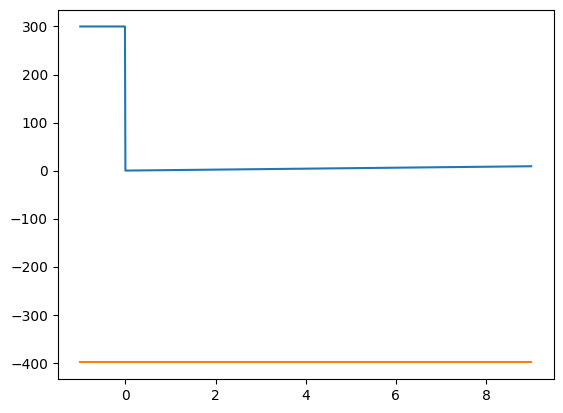

In [75]:
x = np.linspace(-sizeB, sizeA, resolution)
y = []
for i in x:
    y.append(potentialFunc(i))

print(evals[0])

plt.plot(x,y)
plt.plot(x, [evals[0] for i in range(resolution)])
plt.show()

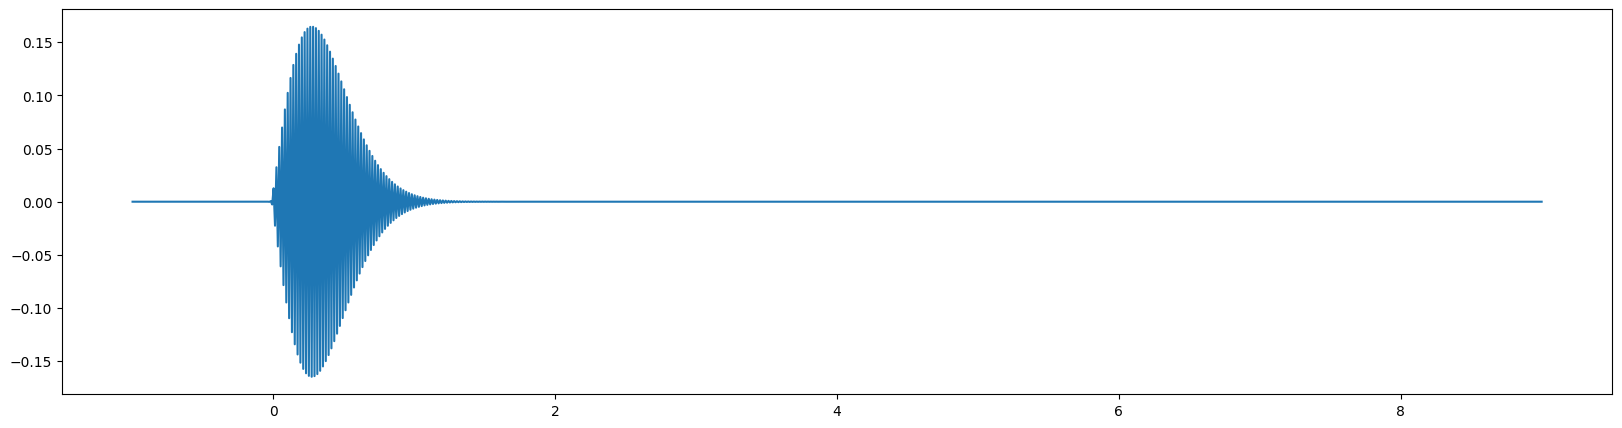

In [76]:
x = np.linspace(-sizeB, sizeA, resolution)
y = []
for i in x:
    y.append(potentialFunc(i))

plt.figure(figsize=(20,5))
plt.plot(x,evecs[0][0])
plt.show()

In [77]:
print(evals)

[np.float64(-399.5076248840097), np.float64(-399.1304679937438), np.float64(-398.8217218327667), np.float64(-398.5488769323416), np.float64(-398.29948269458765), np.float64(-398.0671097912972), np.float64(-397.84789491939944), np.float64(-397.6392889109235), np.float64(-397.43949851797373), np.float64(-397.2472019405234), np.float64(-397.0613895302524), np.float64(-396.8812680780152), np.float64(-396.7062000635695), np.float64(-396.53566336276026), np.float64(-396.3692235408176), np.float64(-396.2065142163803), np.float64(-396.0472227839807), np.float64(-395.8910798013043), np.float64(-395.73785094786905), np.float64(-395.5873308287007), np.float64(-395.43933812807364), np.float64(-395.2937117685319), np.float64(-395.1503078302096), np.float64(-395.00899705328067), np.float64(-394.8696627933492), np.float64(-394.73219933272617), np.float64(-394.5965104742832), np.float64(-394.46250836184464), np.float64(-394.33011248380006), np.float64(-394.19924882612156), np.float64(-394.069849148130

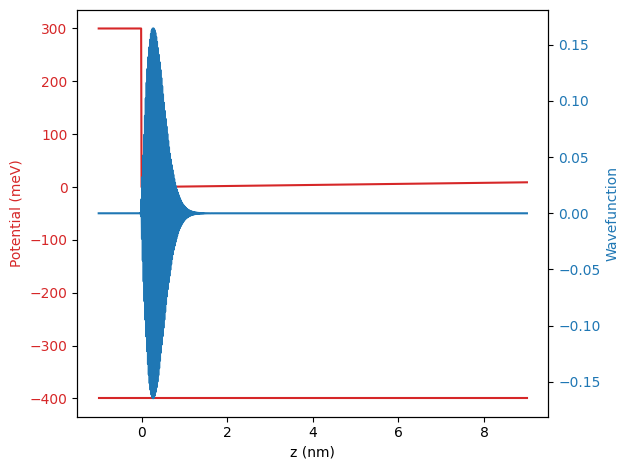

In [78]:
temp = 0
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('z (nm)')
ax1.set_ylabel('Potential (meV)', color=color)
ax1.plot(x, y, color=color)
ax1.plot(x, [evals[temp] for i in range(resolution)], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wavefunction', color=color)  # we already handled the x-label with ax1
ax2.plot(x, evecs[temp][0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()